In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import json

In [2]:
k_m0_L = 3.20e-2  
k_m0_T = 1.19e-1  
k_m_L = 8.30
k_m_T = 2.06
k_p_L = 9.726e-1  
k_p_T = 9.726e-1  
g_m_L = 1.386e-1
g_m_T = 1.386e-1
g_p_L = 1.65e-2
g_p_T = 1.65e-2
theta_LacI = 31.94
theta_TetR = 30.00
theta_IPTG = 9.06e-2
theta_aTc = 11.65
eta_LacI = 2.00
eta_TetR = 2.00
eta_IPTG = 2.00
eta_aTc = 2.00

In [3]:
def func(x):
    return [
        k_m0_L + k_m_L*(1 / (1 + ((x[3]/theta_TetR) * (1 / (1 + (v_1/theta_aTc)**eta_aTc)))**eta_TetR)) - g_m_L * x[0], 
        k_m0_T + k_m_T*(1 / (1 + ((x[2]/theta_LacI) * (1 / (1 + (v_2/theta_IPTG)**eta_IPTG)))**eta_LacI)) - g_m_T * x[1],
        k_p_L * x[0] - g_p_L * x[2], 
        k_p_T * x[1] - g_p_T * x[3]
    ]

## Compute the equilibria points

In [4]:
equilibria = np.empty((3, 4))

for i in range(3):
    match i:
        case 0:
            v_1 = 0
            v_2 = 0
        case 1:
            v_1 = 35
            v_2 = 0
        case 2:
            v_1 = 0
            v_2 = 0.35

    equilibria[i][:] = fsolve(func, [0, 0, 0, 0])


print('Equilibrium point with zero inducers concentration:')
print('   mRNA LacI   ', '   mRNA TetR   ', '    LacI   ', '      TetR   ')
print(equilibria[0])
print('\n')

print('Equilibrium point with maximum aTc concentration:')
print('   mRNA LacI   ', '   mRNA TetR   ', '    LacI   ', '      TetR   ')
print(equilibria[1])
print('\n')

print('Equilibrium point with maximum IPTG concentration:')
print('   mRNA LacI   ', '   mRNA TetR   ', '    LacI   ', '      TetR   ')
print(equilibria[2])


Equilibrium point with zero inducers concentration:
   mRNA LacI       mRNA TetR        LacI          TetR   
[1.53132989e+01 8.77172128e-01 9.02649363e+02 5.17053098e+01]


Equilibrium point with maximum aTc concentration:
   mRNA LacI       mRNA TetR        LacI          TetR   
[5.84618243e+01 8.59862565e-01 3.44605881e+03 5.06849898e+01]


Equilibrium point with maximum IPTG concentration:
   mRNA LacI       mRNA TetR        LacI          TetR   
[2.93709750e-01 1.57042989e+01 1.73128547e+01 9.25697036e+02]


## Phase diagram of the controlled deterministic model

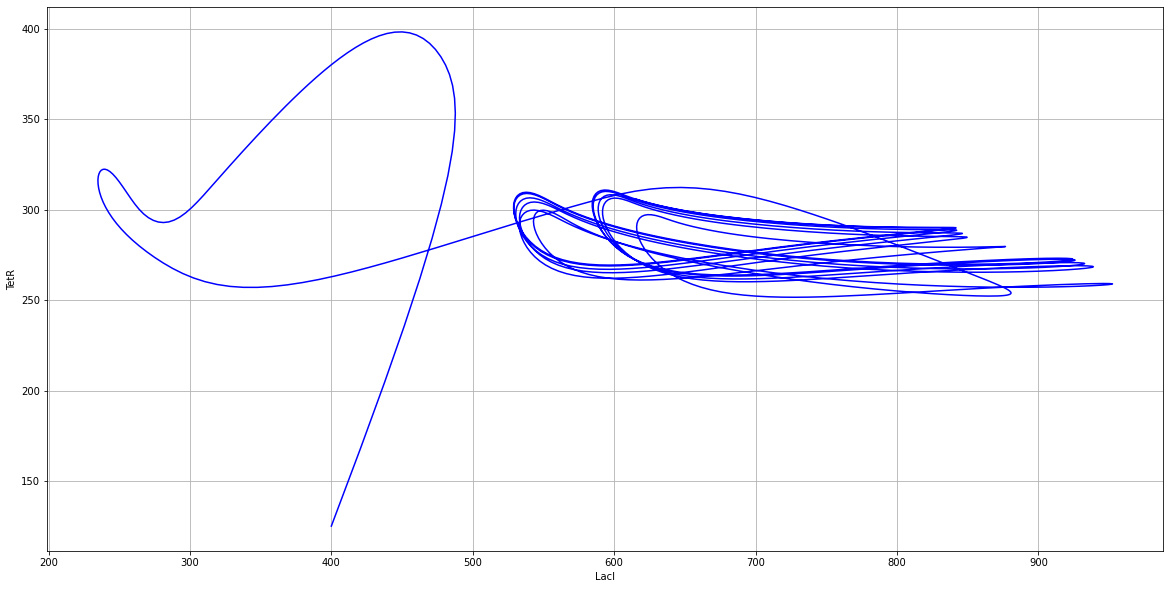

In [5]:
fig_x = 20
fig_y = 10

x3 = np.zeros(1440)
x4 = np.empty(1440)

with open('./data/deterministic/results0.json') as f:
    data = json.load(f)
    x3[:] = data['states']['LacI']
    x4[:] = data['states']['TetR']

plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

figure, ax = plt.subplots(1, sharex=True, figsize=(fig_x, fig_y))

ax.set_ylabel('TetR')
ax.set_xlabel('LacI')
ax.set_title('')
line, = ax.plot(x3, x4, color='b')
